# Einführung in Neuronale Netze

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Neural_network.svg" alt="Ein Neuronales Netz (vereinfacht)" width="400px" />

## Inhaltsverzeichnis 

1. Einleitung
2. einzelnes Neuron
3. Einfaches Neuronales Netz
4. Feedforward
5. Backpropagation
6. Hyperparameter 
7. Kostenfunktion
8. Optimizer 
9. Overfitting und Underfitting 


## Einleitung

> A single neuron in the brain is an incredibly complex machine that even today we don't understand. A single 'neuron' in a neural network is an incredibly simple mathematical function that captures a minuscule fraction of the complexity of a biological neuron. - Andrew Ng

Ein Neuronales Netz zu Beginn, wenn man es noch nicht versteht sehr komplex und abstrakt wirken kann. Je mehr man jedoch in die Materie einsteigt, desto klarer wird, dass es doch eigentlich nur eine Menge mathematischer Operationen sind, die darauf abzielen einen bestimmten Wert zu minimieren. Trotz dieser eigentlichen Einfachheit setzen viele globale Player wie Apple, Microsoft, Google auf Neuronale Netze und implementieren diese gekonnt in Ihrem Unternehmen zur Klassifizierung, Recommendation-System und für viele weitere Bereiche.

Daher freuen wir uns besonders in unserer Ausarbeitung und Präsentation das Thema vorzustellen. Um einen kurzen Ausblick zu geben, was wir behandeln werden: Wir werden den grundsätzlichen Aufbau eines Neuronalen Netzes beleuchten, die Hyperparameter, Kostenfunktionen und Optimizer vorstellen und in einigen Punkten darauf eingehen wie man diese richtig und passend für sein Model bestimmt. Das Erreichen wir zum Teil durch Text-Beschreibungen und Erklärungen und zum anderen haben wir uns Bilder-, Text- und Code-Beispiele überlegt, mit welchen die Themen leichter verständlich gemacht werden sollen.


## Das einzelne Neuron
<img src="https://miro.medium.com/max/856/1*O7YSSqlOdQuNgMrH7J_3dg.png" alt="Das einzelne Neuron" />

Ein Neuronales Netz besteht aus vielen Neuronen, die miteinander verbunden sind. Dabei sind die Neuronen denen im Gehirn nachempfunden, welche untereinander verbunden sind und die aufeinander reagieren. Bei künstlichen Neuronalen Netzen hat jedes Neuron eine oder mehrere Eingaben $x_1...x_m$ und eine Ausgabe $o_j$. Die Eingaben werden mit Gewichten $w_1...w_m$ multipliziert und anschließend addiert ($ net_j = \displaystyle\sum_{i=1}^{m} (x_i \cdot w_i) $). Des Weiteren gibt es einen Bias $b_j$ ($j$ steht für ein bestimmtes Neuron. Jedes Neuron hat einen eigenen Bias). Dieser wird auf diese Summe drauf addiert ($ net_j = \displaystyle\sum_{i=1}^{m} (x_i \cdot w_i) + b_j $).Das Ergebnis wird dann in eine Aktivierungsfunktion $\varphi_j(x)$  gegeben, welche das Ergebnis in die Ausgabe des Neurons umwandelt $o_j = \varphi_j(net_j)$ und die dann ein Eingabewert (ein anderes $x$) für die nächsten Neuronen ist (oder die Ausgabe des Neuronalen Netzes darstellt, wenn das Neuron an der hintersten Ebene ist).

### Einfaches Beispiel 
 
Wir nehmen an wir haben ein Neuron mit zwei Inputs, welches die Sigmoid Funktion als Aktivierungsfunktion verwendet. Die folgenden Parameter sind gegeben:

$ w = [0, 1] == w1 = 0\ und\ w2 = 1 \\
$ b = 4

Nun geben wir dem Neuron ein input x mit x = [2, 3]

$$
(w*x)+b = ((w1 * x1) + (w2 * x2)) + b 
        = 0 * 2 + 1 * 3 + 4
        = 7
y = f(w * x + b) = f(7) = 0.999       
$$  

Für den Input x = [2, 3] bekommen wir einen Output von 0,999. Dieser Prozess in welchem man inputs eingibt, um ein Output zu bekommen ist bekannt als **feedforward** 

### Programmierung eines Neurons

Um das Neuron zu programmieren importieren wir Numpy. Numpy ist eine beliebte Python Library, um mit Zahlen zu rechnen. 

In [1]:
#Wir importieren numpy als np um numpy nicht immer ausschreiben zu müssen
import numpy as np


def sigmoid(x):
  # Unsere Aktivierungsfunktion: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Gewichtsinputs, Addiere Gewichte und dann nutze die Aktivierungsfunktion
    # np.dot ist eine Funktion um zwei Arrays zu multiplizieren 
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


Wie man sieht, kommen wir mit unserem selbstgecodeten Neuron auf dasselbe Ergebnis, wie zuvor nur mit Mathe.

## Einfaches Neuronales Netz 

Ein neuronales Netz ist im Endeffekt nur eine Verbindung vieler einzelner Neuronen. So kann ein einfaches Neuronales Netz aussehen:



Dieses Neuronale Netz hat zwei Inputs (x1 und x2): ein Hiddenlayer mit zwei Neuronen (h1 und h2) und ein Outputlayer mit einem Neuron (o1). 

Der Input für o1, sind die Outputs von h1 und h2, jeweils mit ihren Gewichten multipliziert und dann aufaddiert.

Ein Hiddenlayer ist jedes Layer zwischen dem ersten Layer dem Inputlayer und dem letzten Layer dem Outputlayer. Es kann mehrere Hiddenlayer geben.

### Ein Beispiel für Feedforward

Wir benutzen das Netzwerk von oben und nehmen an, dass alle Neuronen die selben Gewichte haben w = [0, 1], dasselbe gilt für den Bias b=0 und die selbe Aktivierungsfunktion Sigmoid. Nun schauen wir uns die Outputs für den Input x = [2, 3] an.

$$
h1 = h2 = f(w*x+b) \\ 
        = f((0 * 2) + (1 * 3) + 0) \\ 
        = f(3) \\ 
        = 0.9526
$$

$$
o1 = f(w * [h1, h2] + b) \\
= f((0 * h1) + (1 * h2) + 0) \\
= f(0.9526) \\
= 0.7216
$$

Der Output für den Input x = [2,3] ist 0.7216

## Ein künstliches Neuronales Netz
<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" alt="Ein neuronales Netz" width="400px" />

### Aufbau eines neuronalen Netzes

Ein neuronales Netz besteht immer aus mindestens einer Schicht mit jeweils mindestens einem Neuron. Die zu verarbeitenden Daten werden in die erste Schicht Neuronen gegeben (Input-Layer), wird dann durch das Netz verarbeitet und in der letzte Schicht bildet ein oder mehr Neuronen die Ausgabe (die Anzahl von Neuronen pro Schicht – vor allem bei der Ein- und Ausgabeschicht – wird meistens vom Anwendungsfall bestimmt). Meistens sind alle Neuronen einer Schicht mit den Neuronen der nächsten Schicht verknüpft, das heißt die Ausgaben aller Neuronen einer Schicht sind Eingaben für die Neuronen der nächsten Schicht (das ist aber nicht zwingend so!). Bevor die Eingabewerte jedoch addiert werden und ihren Weg durch die Aktivierungsfunktion gehen, wird jede Ausgabe eines Neurons zu einem anderen mit einem eigenen Gewicht multipliziert. Dabei hat jede Verbindung ein eigenes Gewicht. Die Gewichte werden beim Training des neuronalen Netzes angepasst, sodass das Netz besser lernt, und eben diese Gewichte gilt es so zu wählen, dass das Neuronale Netz die besten Ausgaben gibt. Am Anfang werden diese Gewichte meist mit einem zufälligen Wert initialisiert (ist auch der Standardwert in den meisten Frameworks).

### Backpropagation

Backpropagation ist die bekannteste Methode, wie die Gewichte eines neuronalen Netzes beim überwachten Lernen angepasst werden. Dabei wird der Fehler der Ausgabe mit der gewünschten Ausgabe verglichen und die Gewichte so angepasst, dass der Fehler möglichst klein wird. Wie groß der errechnete Wert des Fehlers ist, hängt davon ab, welche Loss Function / Kostenfunktion man benutzt (wird später noch genauer erklärt). Die Backpropagation erhielt ihren Namen, weil die Gewichte "rückwärts" von der letzten Schicht bis hin zum Anfang des Netzes angepasst werden.

## Hyperparameter

Hyperparameter sind Parameter, die vor der Durchführung des gewählten Ansatzes an das Model übergeben werden. Diese definieren damit die Eigenschaften des gewählten Models.

### Hyperparameter eines neuronalen Netzes
* Anzahl der Schichten
* Anzahl der Neuronen pro Schicht
* Aktivierungsfunktion
* Optimierer
* Lernrate
* Batchgröße
* Anzahl der Epochen
* Kostenfunktion

### Aktivierungsfunktionen

#### Warum gibt es Aktivierungsfunktionen?
 Aktivierungsfunktionen werden verwendet, um dem neuronalen Netzwerk eine nicht lineare Eigenschaft zu verleihen. Auf diese Weise kann das Netz komplexere Beziehungen und Muster in den Daten modellieren. 
#### Beispiele für Aktivierungsfunktionen
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d244bb0e12c94fb442c01e_pasted%20image%200%20(4).jpg" alt="Lineare Aktiverungsfunktion" height="300px" />
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d24547f85f71e3bd2339f8_pasted%20image%200%20(5).jpg" alt="Sigmoid-Aktiverungsfunktion" height="300px" />
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d24d1ac2cc1ded69730feb_relu.jpg" alt="ReLu-Aktiverungsfunktion" height="300px" />

* Die Lineare Aktivierungsfunktion ist die einfachste Aktivierungsfunktion und ist eine Gerade. Sie ist nicht sehr gut für die meisten Modelle geeignet, da sie nur lineare Beziehungen zwischen den Inputs und Outputs modellieren kann.
* Die Sigmoid-Funktion wird oft für Hiddenlayer und die Ausgabe des Neuronalen Netzes verwendet, da sie eine Wahrscheinlichkeit zwischen 0 und 1 ausgibt. Sie ist sehr populär, jedoch hat sie an Beliebtheit verloren, da sie die Gradienten "töten" kann, wenn der Input sehr große Werte annimmt. Dies kann dazu führen, dass das Neuronale Netz nicht mehr lernt. 
* Die ReLu-Funktion ist eine weitere sehr beliebte Aktivierungsfunktion. Man könnte meinen dass sie ähnlich wie die lineare Funktion ist, da sie auch eine Gerade für $x>0$ ist. Jedoch ist sie nicht linear, da sie für $x<0$ eine Null ausgibt. Sie beschleunigt die Konvergenz des Gradientabstiegs in Richtung des globalen Minimums und kann so genutzt werden, um oft schneller zu lernen. Besonders bei der ReLu-Funktion muss man jedoch darauf achten, dass Neuronen nicht "tot" sind, also immer eine Null ausgeben. 
* **Softmax-Funktion**: Zur Softmax-Funktion gibt es keinen Graphen zu zeigen, da sie eine Funktion ist, die auf mehreren Neuronen angewendet wird. Sie wird oft für die Ausgabe des Neuronalen Netzes verwendet, da sie eine Wahrscheinlichkeit zwischen 0 und 1 für jede Klasse ausgibt (wie die Sigmoid-Funktion), jedoch auch dafür sorgt, dass die Summe aller *Wahrscheinlichkeiten* 1 ergibt. Daher eignet sie sich super für Klassifikationsprobleme wie das Erkennen von Ziffern (MNIST) oder das Erkennen von Tieren (CIFAR-10), da der Output dann eine Wahrscheinlichkeit für jede Klasse ausgibt.

### Epochen-Anzahl

Die Anzahl der Epochen beschreibt, wie oft das Netz mit den kompletten Daten lernt (ein Epochen-Durchlauf = einmal alle Daten gesehen). Eine einzige Epoche reicht aber nicht aus, deswegen werden mehrere Epochen durchgeführt. Die optimale Anzahl der Epochen sorgt dafür, dass das Netz sehr gut auf den Daten gelernt hat, jedoch nicht zu sehr übertrainiert ist (Under- oder Overfitting). Wie viele Epochen am besten sind, kann man nicht pauschal sagen. Am einfachsten ist es, man trainiert das Modell so viele Epochen lang, bis man erkennt, dass das Netz nicht mehr lernt bzw die Kostenfunktion wieder ansteigt.

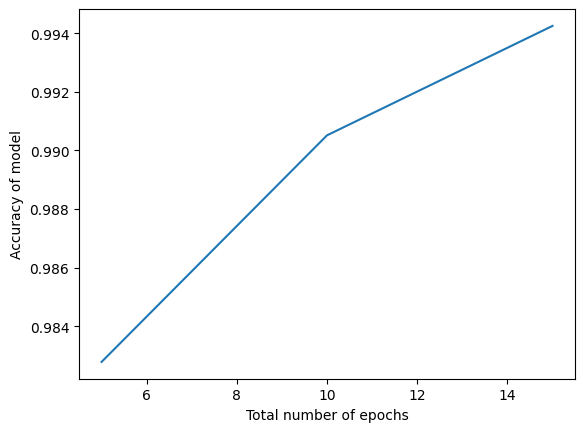

In [3]:
# Vergleich zwischen meherern Modellen mit unterschiedlicher Epochen-Anzahl
from mnist_model import get_trained_mnist_model, plot_accuracy_by_total_epochs

# Trainiere 3 Modelle mit unterschiedlichen Epochen-Anzahlen
models = [
    get_trained_mnist_model(epochs=5),
    get_trained_mnist_model(epochs=10),
    get_trained_mnist_model(epochs=15),
]

# Plotten der Ergebnisse
plot_accuracy_by_total_epochs(models)


### Batch-Größe

Die Batch-Größe beschreibt, wie viele Daten gleichzeitig in das Netz eingegeben werden. Der komplette Datensatz kann meistens nicht gleichzeitig in das Netz eingegeben werden, da das zu viel Speicherplatz benötigt. Deswegen werden die Daten in Batches aufgeteilt und einzeln in das Netz eingegeben. Nach jeder Batch (auch Mini-Batch genannt) finden die Parameter-Updates / Regulierung der Gewichte statt. Ist eine Batch-Größe von 1 gewählt, so wird jedes Mal nur ein Datensatz in das Netz eingegeben. Ist die Batch-Größe gleich der Anzahl der Daten, so wird der komplette Datensatz gleichzeitig in das Netz eingegeben. Eine Batch-Größe von 32 ist sehr häufig gewählt, da sie eine gute Balance zwischen Speicherplatz und Lerngeschwindigkeit bietet (32 ist auch der Standardwert in Keras). Ist die Batch-Größe zu groß, so kann es passieren, dass das Netz nicht mehr lernt, da die Parameter-Updates zu ungenau sind. Ist die Batch-Größe zu klein, so kann es passieren, dass das Netz zu lange braucht, um zu lernen.

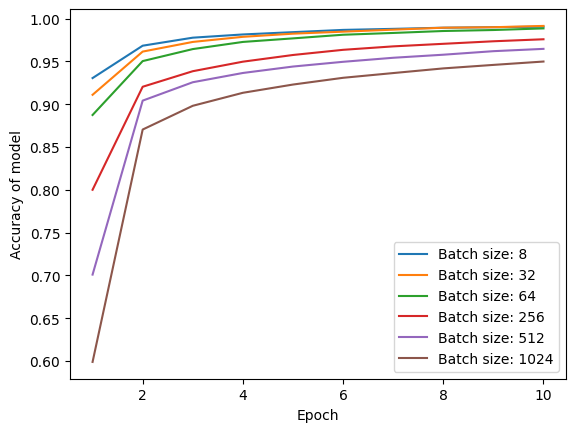

In [2]:
# Vergleich zwischen meherern Modellen mit unterschiedlicher Batch-Größe
from mnist_model import get_trained_mnist_model, plot_accuracy_by_batch_size

# Trainiere 6 Modelle mit unterschiedlichen Batch-Größen
models = [
    get_trained_mnist_model(batch_size=8),
    get_trained_mnist_model(batch_size=32),
    get_trained_mnist_model(batch_size=64),
    get_trained_mnist_model(batch_size=256),
    get_trained_mnist_model(batch_size=512),
    get_trained_mnist_model(batch_size=1024)
]

# Plotten der Ergebnisse
plot_accuracy_by_batch_size(models, [8, 32, 64, 256, 512, 1024])

Wie man erkennt, ergibt sich bis zu einer Batch-Size von 64 so gut wie keine Veränderung in der Genauigkeit, jedoch wird die Lerngeschwindigkeit deutlich erhöht!

### Lernrate
<div style="display:flex; justify-content: center;">
<div>Die Lernrate bestimmt, wie stark die Parameter bei jeder Batch angepasst werden. Kleine Lernraten sorgen dafür, dass das Netz nicht so schnell lernt, konvergiert dafür aber reibungsloser. Große Lernraten beschleunigen den Lernprozess, jedoch kann es passieren, dass das Netz nicht mehr lernt, da die Parameter-Updates zu ungenau sind (Siehe Bild). Die Lernrate sollte also so gewählt werden, dass das Netz schnell lernt, jedoch nicht zu schnell lernt. Meistens ist es am besten, zuerst eine Lernrate von 0,1 oder 0,01 zu wählen und zu beobachten, wie gut das Modell damit trainiert. Dementsprechend kann die Lernrate angepasst werden.</div>

<img src="https://miro.medium.com/max/1276/0*FA9UmDXdzYzuOpeO.jpg" alt="Lernrate Veranschaulichung" width="350px" style="margin: 20px" />
</div>


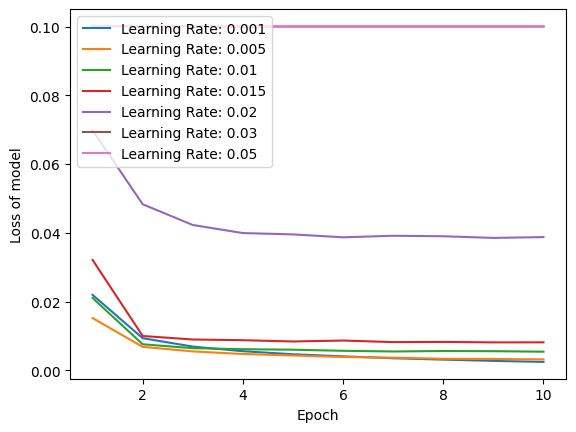

In [1]:
# Vergleich zwischen meherern Modellen mit unterschiedlicher Batch-Größe
from mnist_model import get_trained_mnist_model, plot_loss_by_learning_rate
from keras.optimizers import Adam

# Trainiere 5 Modelle mit unterschiedlichen Batch-Größen
# In diesem Beispiel wird der "Adam" Optimizer verwendet.
# Dieser und weitere Optimizer werden im nächsten Kaptiel behandelt.
models = [
    get_trained_mnist_model(
        10, batch_size=64, optimizer=Adam(learning_rate=0.001)),
    get_trained_mnist_model(
        10, batch_size=64, optimizer=Adam(learning_rate=0.005)),
    get_trained_mnist_model(
        10, batch_size=64, optimizer=Adam(learning_rate=0.01)),
    get_trained_mnist_model(
        10, batch_size=64, optimizer=Adam(learning_rate=0.015)),
    get_trained_mnist_model(
        10, batch_size=64, optimizer=Adam(learning_rate=0.02)),
    get_trained_mnist_model(
        10, batch_size=64, optimizer=Adam(learning_rate=0.03)),
    get_trained_mnist_model(
        10, batch_size=64, optimizer=Adam(learning_rate=0.05)),
]

# Plotten der Ergebnisse
plot_loss_by_learning_rate(
    models, [0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.05])

Dem Graphen ist zu entnehmen, dass die Modelle mit einer Lernrate von 0.001-0.01 ähnlich gut performen. Ab einer Lernrate von 0.015 lässt sich erkennen, dass das Modell ab einer bestimmten Epochen keinen Fortschritt mehr macht,
da die Kostenfunktion nicht mehr sinkt. Bei einer Lernrate ab 0.03 fällt die Kostenfunktion gar nicht, da sich das Model nicht dem globalen Minimum nähern kann, da die Schritte zu groß sind (Siehe Grafik).

### Optimizer

**"Der richtige Optimizer Algorithmus kann die Trainingszeit exponentiell verringern."**

Der Optimizer in einem Neuronalen Netz beschreibt wie das Neuronale Netz lernt. 
Optimization: Optimizer sind Algorithmen, welche mithilfe der Veränderung der Attribute im Neuronalen Netz wie z.B. die Gewichte oder die Learning Rate versuchen die Kosten zu verringern. Folgende Grafik hilft bei der Veranschaulichung:

<img src="https://miro.medium.com/max/1156/1*65Mxg_Yfq-L7AvaS0K5aGA.png" alt="Learned Optimizer" width="400px" />

Das Ziel des Optimizers ist es, das globale Minimum zu finden und dadurch die Kosten auf ein Minimum zu bringen. 

Nun werden wir mithilfe von Tensorflow ein Neuronales Netz programmieren und uns ein paar Beispiele zu Optimizern anschauen.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


# Laden des MNIST Datensatzes
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalisieren der Pixelwerte  
train_images = train_images / 255.0
test_images = test_images / 255.0

def get_model():
  return keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])

In [ ]:
model_sgd = get_model() # Modell mit Stochastic Gradient Descent Optimizer
model_adam = get_model() # Modell mit Adam Optimizer
model_rmsprop = get_model() # Modell mit RMSProp Optimizer

model_adam.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_rmsprop.compile(
    optimizer='rmsprop',
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_sgd.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy']
)

models = [model_adam, model_rmsprop, model_sgd]

Test labels categorical:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Verwendung der categorical_crossentropy gefordert


Test labels non categorical:
[7 2]
Verwendung der sparse_categorical_crossentropy gefordert

In [3]:
_train_labels = keras.utils.to_categorical(train_labels, 10)
_test_labels = keras.utils.to_categorical(test_labels, 10)

#15 Epochen lang werden nun die einzelnen Modelle trainiert
epochs=15
history = [model.fit(train_images, _train_labels, epochs=epochs, validation_data=(test_images, _test_labels), verbose=True) for model in models] 

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0012 - accuracy: 0.9941 - val_loss: 0.0040 - val_accuracy: 0.9789
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0010 - accuracy: 0.9945 - val_loss: 0.0037 - val_accuracy: 0.9805
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 9.9383e-04 - accuracy: 0.9946 - val_loss: 0.0036 - val_accuracy: 0.9824
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6458e-04 - accuracy: 0.9948 - val_loss: 0.0037 - val_accuracy: 0.9819
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6356e-04 - accuracy: 0.9948 - val_loss: 0.0038 - val_accuracy: 0.9815
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 9.2324e-04 - accuracy: 0.9952 - val_loss: 0.0037 - val_accuracy: 0.9816
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 8.3173e-04 - accuracy: 0.9953 - val_loss: 0.

#### Vergleich der Genaugkaiten der verschiedenen Optimizer

Das Ergebnis des Lernens plotten wir nun auf einen Graphen.

<module 'matplotlib.pyplot' from 'c:\\Users\\paulg\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

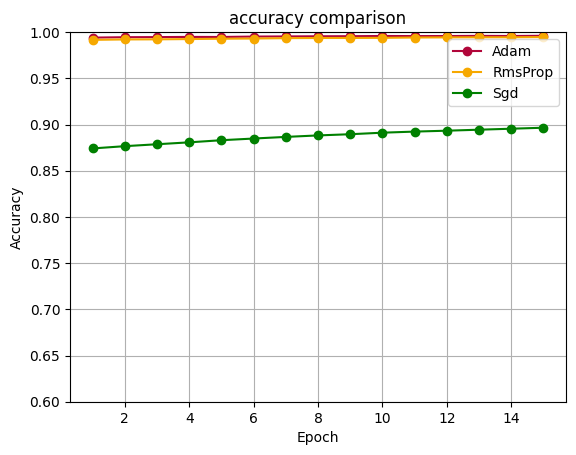

In [7]:
def plot_learning_curve(ylim=0.6):
    plt.figure()
    plt.title("accuracy comparison")
    axes = plt.gca()
    axes.set_ylim([ylim, 1])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    train_sizes = np.arange(1, 1 + len(history[0].history['accuracy']))

    plt.grid()

    plt.plot(
        train_sizes,
        history[0].history['accuracy'],
        'o-',
        color=(177/255, 6/255, 58/255),
        label="Adam"
    )
    plt.plot(
        train_sizes,
        history[1].history['accuracy'],
        'o-',
        color=(246/255, 168/255, 0),
        label="RmsProp"
    )
    
    plt.plot(
        train_sizes,
        history[2].history['accuracy'],
        'o-',
        color='green',
        label="Sgd"
    )

    plt.legend(loc="best")
    return plt

plot_learning_curve()

### Gradient Descent

Durch seine Einfachheit ist der Gradient Descent der meistebenutzte Optimizer. Vor allem findet er Anwendung bei Problemen mit Linearer Regression oder Klassifikation.
Für Backpropagation in Neuronalen Netzen wird ebenfalls Gradient Descent verwendet.  

"Unter Gradient Descent versteht man einen Optimierungsalgorithmus, der das Minimum einer Funktion findet, indem er sich schrittweise in Richtung des stärksten Gefälles bewegt. Dies kann man sich anschaulich wie eine blinde Person vorstellen, die auf einem Berg steht, und einen im Tal gelegenen See erreichen möchte"

In der Praxis in unserem Besipiel würden wir zu Beginn einfach eine zufällige Position in unserer Kostenfunktion als Startposition festlegen und würden dann nach dem stärksten Gefälle suchen. Bei einer  Funktion mit zwei inputs, kann man das gut nachvollziehen. Wir würden einfach schauen, ob die Steigung m in y = mx + b negativ ist oder positiv. Ist die Steigung positiv bewegen wir uns nach links und wenn Sie negativ ist umgekehrt. Wir bewegen uns in der Schrittweite unserer Learning Rate. An der neuen Position, wiederholen wir das Ganze mit der Anzahl an Epochen die wir angegeben haben.
Am Ende des Verlaufs sollten wir in einem Minimum landen, wobei das je nach Epochenanzahl, Learning Rate und Kostenfunktion nicht zwingend ist, aber auf jeden Fall erwünscht. Im Bild ist ein einfaches Beispiel zu sehen. 

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG_0.png" alt="Einfaches Beispiel Gradient Descent" width="400px" />



**Zu beachten:** 
Es ist nicht schwer ein Minimum mit dem Gradient Descent Verfahren zu finden, jedoch muss man beachten, dass nciht immer das globale Minimum gefunden wird, sondern je nach Startposition man in einem lokalen Minimum landet und dieses nicht immer die Resultate liefert, welche man sich wünscht. Das kann man umgehen, wenn man theoretisch n-viele verschiedene Startpositionen hat. Dann wird sich mit Sicherheit irgendwann eine Startposition finden, bei welcher das globale Minimum erreicht werden kann. Jedoch ist dieser Prozess sehr zeitaufwendig bei komplexen Problemen 

**Vorteile:**
- Einfach auszurechnen
- Einfach anzuwenden
- Einfach zu verstehen
- Gut für kleine Datensätze

**Nachteile:**
- Kann im lokalen Minimum stecken bleiben
- Die Gewichte werden nach jedem Durchlauf im gesamten Datenset angepasst, das kann bei großen Datensets zu einer großen zeitlichen Aufwand führen.
- Benötigt viel Speicher um den Gradienten auf dem gesamten Datenset zu errechnen. Das fällt wieder bei großen Datensets ins Gewicht. 

Es gibt drei Arten von Gradient Descent Verfahren, welche wir uns nun genauer ansehen.


#### Batch Gradient Descent

Beim Batch Gradient Descent gehen wir durch alle Datensätze im Datensatz und berechnen am Ende der Epoche die Gesamtkosten. Die Gesamtkosten ergeben sich aus der Summe von den Kosten für jeden Datensatz. Das schauen wir uns genauer an einem Beispiel mit Hauspreisen an.

<table>
  <tr>
    <th>area</th>
    <th>bedrooms</th>
    <th>price</th>
  </tr>
  <tr>
    <td>2600</td>
    <td>3</td>
    <td>550000</td>
  </tr>
  <tr>
    <td>3000 </td>
    <td>4</td>
    <td>565000</td>
  </tr>
  <tr>
    <td>3200</td>
    <td>3</td>
    <td>610000</td>
  </tr>
  <tr>
    <td>3600</td>
    <td>3</td>
    <td>595000</td>
  </tr>
  <tr>
    <td>4000</td>
    <td>5</td>
    <td>760000</td>
  </tr>
  <tr>
    <td>4100</td>
    <td>6</td>
    <td>810000</td>
  </tr>
</table>

Im Bild zu sehen ist ein Datensatz mit 3 Spalten (Fläche, Schlafzimmer und Preis) und mit 6 Datensätzen. Unser Ziel ist es den Preis vorherzusagen. Dafür haben wir folgende Formel:
$$ \hat{p} \ ist \ der \ vorhergesagte\ Preis $$
$$ p \ ist \ der \ tatsächliche\ Preis $$
$$w1, \ w2 \ sind \ die \ Gewichte $$
$$b \ ist \ der \ Bias $$
$$f \ ist \ die \ Fläche $$ 
$$s \ ist \ die \ Anzahl \ an \ Schlafzimmern $$
$$\hat{p} = w1 * f + w2 * s + b$$

In unserem Beispiel bestimmen wir einfach $$w1,w2,b = 1$$
und rechnen nun für alle Datensätze die vorhergesagten Preise aus:
$$\hat{p1} = 1 * 2600 + 1 * 3 + 1 = 2604$$ 
$$\hat{p2} = 1 * 3000 + 1 * 4 + 1 = 3005$$
Das System ist nicht schwer zu erkennen, daher hören wir mit der Kalkulation an der Stelle auf, aber normalerweise würden wir das für alle Datensätze im Datensatz machen.
Parallel zum errechnen der Preise erechnen wir für jeden einzelnen Datensatz die Kosten. Das erfolgt mit dieser Formel:
$$k \ sind \ die\ Kosten$$
$$k = (p1 - \hat{p1})^2$$

Nun können wir mit der Formel die Kosten berechnen.

$$k1 = (550000 - 2604)^2$$
$$k2 = (565000 - 3005)^2$$

Das machen wir für alle Datensätze. Wenn das Geschehen ist, sind wir am Ende der 1. Epoche. Als letzten Schritt ziehen wir die Summe von allen Kosten. 

$$Gesamtkosten = \sum_{i=1}^{6}ki$$
$$mse\ ist \ Mean Sqaured Error$$
$$mse = \frac{Gesamtkosten}{Menge\ an\ Datensätzen\ (6)}$$

Bevor wir mit der nächsten Epochen starten, passen wir die Gewichte an.

$$w1 = w1 - learning rate * \frac{\partial{(mse)}}{\partial{w1}}$$

$$b = b - learning rate * \frac{\partial{(mse)}}{\partial{b}}$$

$$w1 = 1 - (-50) = 51$$

$$w1 = 1 - (-8) = 9$$

$$b = 1 - (-20000) = 20001$$

$$\hat{p1} = 51 * 2600 + 9 * 3 + 20001 = 152610$$ 

Wir sehen, dass unser vorhergesagter Preis dem tatsächlchen Preis schon näher kommt und unsere Kosten auf jeden Fall kleiner sein werden in der zweiten Epochen. Wir führen das ganze so oft durch bis die ein Minimum der Kostenfunktion erreicht wird. In unserem Beispiel hörne wir an der Stelle auf, da es uns wichtig war das Konzept zu übermitteln und nicht es von vorne bis hinten einmal durchzuspielen.

$$wi = wi - learning rate * \frac{\partial{(mse)}}{\partial{wi}}$$

Diese Formel wenden wir für alle Gewichte an. Auf die partielle Ableitung werden wir an diesem Punkt nicht vertieft eingehen, wir verweisen auf die Quellen, in welchen Unterlagen zu den Partial Derratives (partielle Ableitung auf enlisch) gegeben sind. Um kurz auf Derratives einzugehen, Sie sind sehr ähnlich zur Steigung und werden bei exponentiellen Funktionen größer 1 verwendet. Das heißt bei allen Funktionen die nicht linear oder konstant verlaufen. Zum Beispiel eine quadratische Funktion. Die Ableitung der Funktion $$x^2\ ist\ 2x$$

#### Stochastic Gradient Descent

Bei Stochastic Gradient Descent wählen wir ein zufälliges Gewicht, rechnen die Kosten für dieses Gewicht aus und passen danach mit den Kosten alle Gewichte und den Bias an. Damit ist eine Epoche beendet und wir wiederholen diesen Prozess.

**Zu beachten:** 
Kann manchmal mehr Epochen zum konvergieren brauchen als andere Optimizer, da das Gewicht welches zum optimieren verwendet wird, per Zufall gewählt wird. 

**Vorteile:**
- Gut bei großen Datensätzen, wenn wir nicht zu viel rechnen möchten.
- Konvergiert schneller, da die Model Parameter öfter angepasst werden.
- Braucht weniger Speicher, da wir die Werte von der Kostenfunktion nicht speichern müssen
- Kann neue Minimas finden

**Nachteile:**
- Kann nach Erreichen des gloabeln Minimums wieder rauskommen, da es per Zufall den nächsten Referenzwert wählt.
- Hohe Varianz in den Model Parametern
- Um die selbe Konvergenz wie Batch Gradient Descent zu bekommen, müssen wir langsam mit der Zeit die Learning Rate verringern

#### Mini-Batch Gradient Descent

Mini-Batch Gradient Descent ist ähnlich zu Stochastic Gradient Descent, statt ein zufälligen Datensatz zu wählen, wählen wir ein zufälliges Bündel an Datensätzen, auf welchem wir das Batch Gradient Descent Verfahren anwenden. 

Beispiel: WIr haben ein Datensatz mit 20 Datensätzen, dann könnten wir zum Beispiel ein Bündel von 5 Datensätzen wählen und dafür den Feedforward durchführen und die Gesamtkosten berechnen. Das ist dann unsere Epoche, wir passen die Gewichte an und danach wählen wir zufällig die nächsten 5 Datensätze. 

**Vorteile:**
- Updated regelmäßig die Model Parameter und hat weniger Varianz.
- Braucht moderate Speicherkapazität

**Zusammenfassend können wir sagen, dass alle Gradient Descent Verfahren Ihre Herausforderungen haben:**

Die optimale Learning Rate wählen. Wenn die Learning Rate zu klein ist, braucht das Model zu lange zum konvergieren. <br>
Das manche Parameter dauerhaft konstant bleiben, wir würden Sie aber lieber anpassen. <br>
Es kann Parameter geben die wir nicht im selben Rythmus verändern wollen wie andere. <br>
Kann im lokalen Minmum stecken bleiben.

<img src="https://1.cms.s81c.com/sites/default/files/2020-10-27/Local%20Minimum_SaddlePoints.jpg" alt="Mögliche Probleme in der Konvergenz von Gradient Descent" width="400px" />


#### Coding Beispiel Gradient Descent mit sklearn

wir importieren unsere selbsterstellte csv-Datei mit Pandas und schauen uns diese einmal an. Unser Dataframe besteht aus drei Spalten und 14 Zeilen.

In [4]:
import pandas as pd 
df_housing = pd.read_csv('housing_prices.csv')
df_housing

,area,bedrooms,price
0,200,3,550000
1,300,4,680000
2,100,2,400000
3,200,5,500000
4,400,2,650000
5,200,2,480000
6,250,5,600000
7,100,2,450000
8,600,7,800000
9,550,5,725000


Als nächstes importieren wir sklearn und betreiben preprocessing auf dem Datensatz, dadurch werden alle Datensätze zwischen 0 und 1 skaliert. Wobei 0 der kleinste Wert des Datensatzes ist und 1 der größte. Wenn wir uns unser Dataframe anschauen dann haben wir immer bei Index 8 unseren größten Datensatz und bei Index 13 unseren kleinsten Datensatz. Wir werfen die Spalte 'price' aus dem df (Dataframe) damit wir nur unsere x Werte haben.

In [5]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df_housing.drop('price',axis='columns'))
scaled_X  # sclaed_X besteht nun aus den zwei Spalten area und bedrooms und ist skaliert

array([[0.27272727, 0.33333333],
       [0.45454545, 0.5       ],
       [0.09090909, 0.16666667],
       [0.27272727, 0.66666667],
       [0.63636364, 0.16666667],
       [0.27272727, 0.16666667],
       [0.36363636, 0.66666667],
       [0.09090909, 0.16666667],
       [1.        , 1.        ],
       [0.90909091, 0.66666667],
       [0.45454545, 0.33333333],
       [0.63636364, 0.83333333],
       [0.41818182, 0.16666667],
       [0.        , 0.        ]])

In [6]:
scaled_y = sy.fit_transform(df_housing['price'].values.reshape(df_housing.shape[0],1))
scaled_y

array([[0.58333333],
       [0.8       ],
       [0.33333333],
       [0.5       ],
       [0.75      ],
       [0.46666667],
       [0.66666667],
       [0.41666667],
       [1.        ],
       [0.875     ],
       [0.70833333],
       [0.96666667],
       [0.41666667],
       [0.        ]])

Nun sind unsere Dataframes für x und y so angepasst, damit wir damit arbeiten können. Als nächsten Schritt implementieren wir eine Funktion für den Batch Gradient Descent. 

In [39]:
import numpy as np
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1] # Das gibt uns die Anzahl an Features zurück in unserem
    #Beispiel sind es zwei (area,bedrooms) daher ist number_of_features = 2
    
    w = np.ones(shape=(number_of_features)) # Nun brauchen wir einfach Startgewichte, diese können
    # zufällig gewählt sein. In unserem Beispiel nehmen wir die 1 als w1 und w2
    b = 0  # bias fängt bei uns bei 0 an da können wir, aber auch nehmen was wir wollen.
    total_samples = X.shape[0] # Anzahl an Reihen in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):     
        y_predicted = np.dot(w, X.T) + b # y = w1 * area + w2 * bedrooms + bias
        # X.T taucht Spalten in Reihen bedeutet wenn wir 
        '''
        e = example_list
        vorher e     naher e.T
                    [[1,4],
        [[1, 2,     [2,4],
        2, 2,       [2,5],
        3, 3],      [2,5],
        [4, 4,      [3,6],
        5, 5,       [3,6]]
        6, 6]]      
        '''
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted)) 
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad # Anpassung der Gewichte
        b = b - learning_rate * b_grad # Anpassung vom Bias 
        # Formel ist oben beim Batch Gradient Descent nochmal erklärt
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        # Bei jeder 10. Epoche fügen wir die Kosten und die Epoche den jeweiligen Listen hinzu
        if i%50==0:
            print(f"Epoch: {i}, Weights: {w}, Bias: {b}, Cost: {cost}")
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

# Wir weisen den Output der Funktion den fünf unten angezeigten w,b,cost.. Variablen zu.
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
print(f'Die Gewichte w1 und w2: {w}, der Bias b: {b}, die Kosten: {cost}')

Epoch: 0, Weights: [0.99657554 0.99639105], Bias: -0.004603896103896102, Cost: 0.15450126262626254
Epoch: 50, Weights: [0.88808603 0.87879232], Bias: -0.10757744909845124, Cost: 0.0693104390033905
Epoch: 100, Weights: [0.83503757 0.81698297], Bias: -0.10494193855931723, Cost: 0.05522885717119274
Epoch: 150, Weights: [0.79830448 0.7718876 ], Bias: -0.07923795124766368, Cost: 0.04706495473383574
Epoch: 200, Weights: [0.76805309 0.73366181], Bias: -0.05036092250994574, Cost: 0.040616279530338306
Epoch: 250, Weights: [0.74163244 0.69963109], Bias: -0.022929357800431028, Cost: 0.035378119917097314
Epoch: 300, Weights: [0.7181707 0.6688988], Bias: 0.002146442331722147, Cost: 0.031113793872064848
Epoch: 350, Weights: [0.69725273 0.64102636], Bias: 0.02484065224121092, Cost: 0.027641144681393722
Epoch: 400, Weights: [0.67859488 0.61570856], Bias: 0.045324226308928746, Cost: 0.02481261166105806
Epoch: 450, Weights: [0.66196359 0.59269214], Bias: 0.06379879772861098, Cost: 0.022508193587355695
D

Jede 10. Epoche haben wir ausgegeben, damit wir uns die Ouputs bisschen genauer anschauen können. In der letzten Zeile ist unser Resultat nach 500 Epochen. Wir können gut sehen wie die Kosten mit steigender Epochenzahl sinken und die Gewichte und der Bias so angepasst wird, damit es bestmöglich zu den Daten passt. Nun plotten wir noch die Kosten abhängig von der Epochenzahl

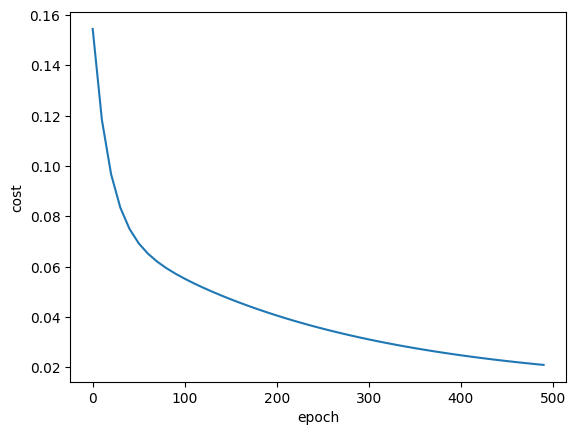

In [17]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

Was ist nun unser Mehrwert von unserem Model? Wir können zum Beispiel nun Vorhersagen tätigen. Dazu impementieren wir eine Funktion.

In [42]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # hier w1 = w[0] , w2 = w[1] und bias ist b
    # Gleichung für den Preis ist w1*area + w2*bedrooms + bias
    # scaled_X[0] ist die Fläche
    # scaled_X[1] sind die Schlafzimmer
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # sobald wir die Schätzung des Preises bekommen müssen wir es zurück scalen, da der Ouput in Wert zwischen 0 uznd 1 ist. 
    # Daher sy.inverse_transform. Das List Inhdexing wird gebraucht, da der Ouput eine zwei dimensionalle Liste mit einem Value in der ersten Liste an erster Stelle hat.[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(200,4,w,b)

c:\Users\paulg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


525674.4730270626

In [44]:
predict(1000,2,w,b)

c:\Users\paulg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


976276.4285353697

In [46]:
predict(300,2,w,b)

c:\Users\paulg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


481872.8278011883

Dassselbe können wir nun auch für Stochastic Gradient Descent machen. Dazu implementieren erst einmal eine Funktion.

In [74]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array mit 1 Spalte und Zeilen gleich der Anzahl von Features. In 
    # unserem Fall number_of_features = 2 (area, bedrooms)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%10000==0: # at every 100th iteration record the cost and epoch value
            print(f"Epoch: {i}, Gewichte: {w}, Bias: {b}, Kosten: {cost}")
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),100000)
print(f'Die Gewichte w1 und w2: {w_sgd}, der Bias b: {b_sgd}, die Kosten: {cost_sgd}')

Epoch: 0, Gewichte: [0.99989953 0.99995996], Bias: -0.00024025974025974008, Kosten: 0.0282851239669421
Epoch: 10000, Gewichte: [0.59856555 0.49986206], Bias: 0.13864497918543328, Kosten: 0.01927746939554222
Epoch: 20000, Gewichte: [0.54680631 0.38762119], Bias: 0.2101334118738257, Kosten: 0.0210781381974647
Epoch: 30000, Gewichte: [0.5456287  0.35105867], Bias: 0.2276639191197257, Kosten: 0.01342235936574492
Epoch: 40000, Gewichte: [0.56105847 0.33949188], Bias: 0.2298490863926534, Kosten: 0.009440429586545764
Epoch: 50000, Gewichte: [0.57098328 0.32914983], Bias: 0.23079048525312415, Kosten: 0.00970760116446844
Epoch: 60000, Gewichte: [0.57446977 0.3162039 ], Bias: 0.2299736817898741, Kosten: 0.011325923346318007
Epoch: 70000, Gewichte: [0.5770861  0.31368936], Bias: 0.2380085405879184, Kosten: 0.056810264494889476
Epoch: 80000, Gewichte: [0.58765092 0.31771205], Bias: 0.22999441511128058, Kosten: 0.018479679449992792
Epoch: 90000, Gewichte: [0.58097528 0.31108064], Bias: 0.2279168060

Was hier direkt auffällt ist, dass wir viel mehr Epochen haben, aber der Code nur bisschen länger braucht zum ausführen. Das liegt daran, dass Batch Gradient Descent bei allen Gewichten die Kosten ausrechnet und Sie dann angepasst werden und bei Stochastic Gradient Descent wird nur ein zufälliges Gewicht ausgewählt, anhand von den Kosten werden alle Gewichte angepasst. Dadurch verläuft die Kostenfunktion viel volatiler und es ist nicht unüblich, dass wir aus dem Minimum wieder herausfallen. Eine Lösung dafür wäre, dass wir das Trainieren abbrechen, sobald wir einen bestimmten Kostenwert erreicht haben. Nun plotten wir noch die Kosten abhängig von der Epochenzahl und schauen uns auch hier anschließend paar Predictions an. 

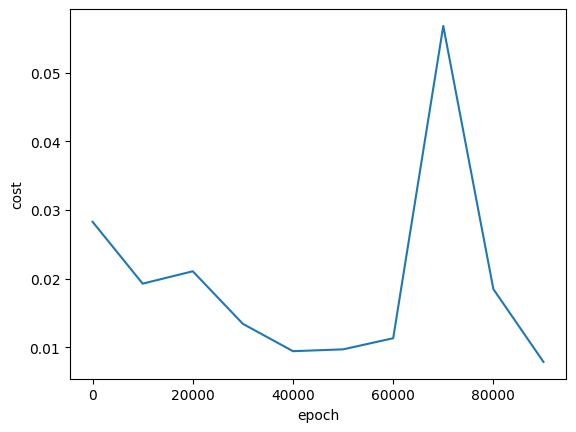

In [76]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

Wir sehen es verläuft um einiges sprunghafter als der Batch Gradient Descent und teilweise waren die Kosten schon nach sehr wenigen Iterationen teilweise sehr niedrig sind, aber sind dann wieder hochgegangen. 

In [54]:
predict(600,4,w_sgd, b_sgd) 

c:\Users\paulg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


789095.3330091073

In [55]:
predict(100,2,w_sgd, b_sgd)

c:\Users\paulg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


363710.8720732219

In [63]:
predict(500,3,w_sgd, b_sgd)

c:\Users\paulg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


834767.1400292962

Die Implementierung vom Code um abbzubrechen, wenn die Kosten einen bestimmten Wert erreichen. In unserem Fall haben wir uns für 0.0000005 entschieden. Der Code wurde mehrfach ausgeführt. Einige Male war das Lernen schon nach weniger als 100 Epochen vollendet und einmal hat es 4000 Epochen gebraucht. Was dadurch klar wird, ist das ein Abbruch sobald ein bestimmter Kostenwert erreicht ist, beim Stochastic Gradient Descent sinnvoll ist, sofern man die Konvergenz einschätzen kann und einen guten Wert Kostenwert für das jewilige Model einschätzen kann. 

In [61]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array mit 1 Spalte und Zeilen gleich der Anzahl von Features. In 
    # unserem Fall number_of_features = 2 (area, bedrooms)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            print(f"Epoch: {i}, Gewichte: {w}, Bias: {b}, Kosten: {cost}")

        cost_list.append(cost)
        epoch_list.append(i)    
        if cost <= 0.0000005:
            break    
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
print(f'Die Gewichte w1 und w2: {w_sgd}, der Bias b: {b_sgd}, die Kosten: {cost_sgd}')

Epoch: 0, Gewichte: [0.9995427  0.99940115], Bias: -0.0007186147186147185, Kosten: 0.2530394857667584
Epoch: 100, Gewichte: [0.9761839  0.97484648], Bias: -0.03001671465610849, Kosten: 0.03831990463251462
Epoch: 200, Gewichte: [0.96241895 0.95910777], Bias: -0.049191800303372155, Kosten: 0.00877533782674041
Die Gewichte w1 und w2: [0.96241918 0.95910794], der Bias b: -0.04919128689315384, die Kosten: 1.2915912560952912e-07


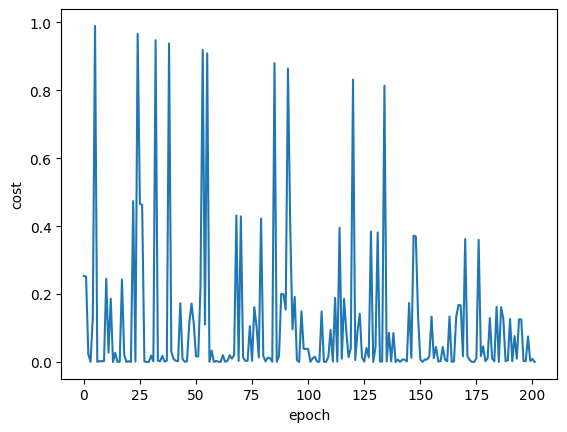

In [64]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

Die Code Implementierung vom Mini-Batch Gradient Descent lassen wir aus, da es einfach die Kombination aus Batch Gradient Descent und Stochastic Gradient Descent ist. Die Theorie dahinter ist weiter oben erklärt. Auf die restlichen Optimizer bis auf Adam werden wir im weiteren Verlauf nur oberflächlich drauf eingehen, da wir es nicht für zeitlich machbar erachten alle in einer Einführung mit Beispielen und Code zu beleuchten. Viel mehr konzentrieren wir uns da auf das grundsätzliche Verständnis, wann welcher Optimizer benutzt werden kann und was die Vor- und Nachteile sind. 

#### Momentum

Momentum ist eine Optimierungsfunktion, welche einen weiteren Hyperparameter ß benötigt als der Batch Gradient Descent Optimizer. ß wird mit den Datenpunkten multipliziert wodurch wir den exponential gewichteten Durchschnitt bekommen. Bekannt als exponentially weighted moving average. Das bedeutet das neue Daten stärker gewichtet werden, als alte in dem jeder Datenpunkt mit einer Variable ß multipliziert wird. Jeder Datenpunkt der ganz neu ist, wird ohne jegliche Multiplikation mit ß angenommen. Ein Datenpunkt der eine Iteration alt ist, wird mit ß multiplizert. ß ist ein Wert zwischen 0 und 1. Normalerwise wird ß auf 0.9 gesetzt. Ein zwei Iterationen alter Datenpunkt wird mit ß^2 multipliziert. Daraus schließen wir, dass alte Datenpunkte nichtmehr in die Gewichtung mit reinfallen, da der Exponent immer größer wird und somit das Ergebnis der Multiplikation gegen null geht. Ein Problem, dass der Momentum Optimizer angeht ist, dass er schneller in die relevante Richtung geht und weniger zackig, wie es zum Beispiel der Mini-Batch Gradient Descent Optimizer oft macht. 

#### Adam

Adam ist der beliebteste Optimizer. Das liegt daran, dass er oft sehr schnell gute Ergebnisse liefert. Adam ist eine Kombination aus Momentum und RMSProb. Da wir RMSProb und Momentum nicht in der Tiefe behandelt haben in unserer Ausarbeitung. Werden wir auch auf Adam nicht in der Tiefe eingehen. Das ist ein Thema für die Zukunft. Der Grund dafür ist, dass die Gradient Descent Verfahren einfacher zu verstehen und somit einfacher zu erklären sind. 

**Vorteile:**
- Findet schnell gute Lösungen 

**Nachteile:**
- Kann über das Minimum hinaus schießen.

<img src="https://miro.medium.com/max/1200/1*_osB82GKHBOT8k1idLqiqA.gif" alt="Various Optimizers" width="400px" />

#### Abschluss

Es nicht leicht zu sagen, welcher Optimizer der beste ist. Es ist immer problemabhängig und oft kann man durch ein wenig probieren herausfinden, welcher geeignet ist. Adam oder Stochastic Gradient Descent sind gute Optimizer zum anfangen. 

### Loss Functions

#### Was ist eine Kostenfunktion?
Eine Kostenfunktion ist eine mathematische Formel. Sie gibt wieder, wie gut ein gegebenes Model zu bestimmten Daten performed. Wir werden uns im Verlauf drei solcher Kostenfunktionen ansehen. Die wohl bekannteste Kostenfunktion unter Laien ist die Mean Squared Error (MSE) Funktion, da Sie oft schon in der Schule behandelt wird. Wir werden aber auch kurz auf die Sparse Categorical Crossentropy (SCCE) Funktion und die Categorical Crossentropy (CCE) Funktion eingehen. Das Ergebnis jeder Kostenfunktionen sind die Kosten, welche wir möglichst klein halten wollen. Je kleiner die Kosten desto besser fittet unser Model die Daten. Wir müssen nur aufpassen, dass wir nicht overfitten.

#### Mean Squared Error
$$
m = vorhergesagten \; Zielwerte 
$$


$$
y = tatsächliche \; Zielwerte 
$$

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(m-y)^2
$$

#### Caterogical Cross Entropy
Im deutschen bekannt als Kreuzentropie.
$$
P = Wahrscheinlichkeit
$$

$$
CCE = -\sum_{i=1}P^*(i) \log_{P(i)}
$$

#### Kostenfunktionen am Beispiel vom MNIST Datensatz
Da der MNIST Datensatz von vorherigen Gruppen schon behandelt wurde, werden wir nicht weiter darauf eingehen, sondern werden uns voll und ganz den Kostenfunktionen widmen

In [2]:
model_mse = get_model() # Modell mit Mean Squared Error Loss
model_cce =  get_model() # Modell mit Categorical Crossentropy
model_scce = get_model() # Modell mit Sparse Categorical Crossentropy

optimizer = 'sgd'

model_mse.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_cce.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_scce.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
  

11490434/11490434 [==============================] - 4s 0us/step


#### Trainiern der Modelle

Dabei werden die Trainigsergebnisse in der history List gespeichert. 

Für das Training mit der Sparse Categorical Crossentropy müssen die Daten nicht geändert weden. Deswegen kann hier schon mit `model.fit()` trainiert werden. Dabei wird gleich ein Validierungsdatensatz festgelegt.

Die anderen beiden Modell werden der models List hinzugefügt, um diese Trainieren zu können. 

In [3]:
epochs=15 # Festlegung von 15 Trainigsepochen
history = [model_scce.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    verbose=True)
]
models = [model_mse, model_cce]

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6490 - accuracy: 0.8356 - val_loss: 0.3588 - val_accuracy: 0.9040
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3414 - accuracy: 0.9043 - val_loss: 0.2954 - val_accuracy: 0.9185
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.9171 - val_loss: 0.2672 - val_accuracy: 0.9275
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2642 - accuracy: 0.9258 - val_loss: 0.2452 - val_accuracy: 0.9317
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2411 - accuracy: 0.9325 - val_loss: 0.2243 - val_accuracy: 0.9374
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2222 - accuracy: 0.9375 - val_loss: 0.2087 - val_accuracy: 0.9406
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2060 - accuracy: 0.9424 - val_loss: 0.1987 - val_accuracy:

#### Umwandlung der Labels in Categorical Labels 
(mehr dazu am Ende des Notebooks) 

Diese werden für das Training mit den anderen Loss Functions benötigt

In [4]:
_train_labels = keras.utils.to_categorical(train_labels, 10)
_test_labels = keras.utils.to_categorical(test_labels, 10)

# Trainieren der anderen beiden Modelle
history += [model.fit(train_images, _train_labels, epochs=epochs, validation_data=(test_images, _test_labels), verbose=True) for model in models]

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1027 - accuracy: 0.2733 - val_loss: 0.0842 - val_accuracy: 0.4589
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.5490 - val_loss: 0.0722 - val_accuracy: 0.6305
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.6615 - val_loss: 0.0603 - val_accuracy: 0.7000
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.7272 - val_loss: 0.0516 - val_accuracy: 0.7654
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.7807 - val_loss: 0.0455 - val_accuracy: 0.8095
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.8103 - val_loss: 0.0411 - val_accuracy: 0.8353
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.8284 - val_loss: 0.0378 - val_accuracy:

#### Plotten der Ergebnisse mit Matplotlib

Über `plt.plot` werden die einzelnen Ergebnisse der Modelle in verschiedenen Farben eingebunden.

<module 'matplotlib.pyplot' from 'c:\\Users\\paulg\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

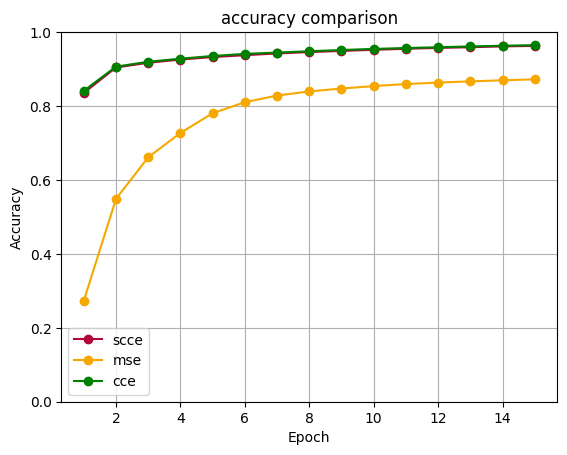

In [5]:
def plot_learning_curve(ylim=0.6):
    plt.figure()
    plt.title("accuracy comparison")
    axes = plt.gca()
    axes.set_ylim([ylim, 1])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    train_sizes = np.arange(1, 1 + len(history[0].history['accuracy']))
    plt.ylim((0,1))
    plt.grid()
    plt.plot(
        train_sizes,
        history[0].history['accuracy'],
        'o-',
        color=(177/255, 6/255, 58/255),
        label="scce"
    )
    plt.plot(
        train_sizes,
        history[1].history['accuracy'],
        'o-',
        color=(246/255, 168/255, 0),
        label="mse")
    
    plt.plot(
        train_sizes,
        history[2].history['accuracy'],
        'o-',
        color='green',
        label="cce"
    )

    plt.legend(loc="best")
    return plt

plot_learning_curve()

- scce = Sparse Categorical Crossentropy
- cce = Categorical Crossentropy
- mse = Mean Squared Error

#### Wann sollte man CategoricalCross Entropy nutzen und wann Sparse Categorical Crossentropy?

für `Categorical Cross Entropy` müssen die Labels als Array mit einer 1 am Index der zugehören Klasse vorliegen.


für `Sparse Categorical Cross Entropy` müssen die Labels mit Bezeichnung der Ausgangsklasse vorliegen.

In [6]:
_test_labels = keras.utils.to_categorical(test_labels, 10)

print('Test labels categorical:')
print(_test_labels[:2])
print('Verwendung der categorical_crossentropy gefordert')
print('\n')
print('Test labels non categorical:')
print(test_labels[:2])
print('Verwendung der sparse_categorical_crossentropy gefordert')

Test labels categorical:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Verwendung der categorical_crossentropy gefordert


Test labels non categorical:
[7 2]
Verwendung der sparse_categorical_crossentropy gefordert


Umwandlung in Categorical Werte:

In [7]:
_test_labels = keras.utils.to_categorical(train_labels, 10)

## Verbessern des Modells
<!-- 
Aufzeigen, wie das Lernen verbessert und beschleunigt werden kann

* Hyperparameter verbessern
* Daten verbessern



### Overfitting / Underfitting

Overfitting ist ein Problem, welches bei jedem Modell auftreten kann. Es ist ein Phänomen, bei dem das Modell zu stark an die Trainingsdaten angepasst wird. Dadurch wird das Modell nicht mehr in der Lage sein, neue Daten zu erkennen. Das Modell lernt die Trainingsdaten zu gut und kann diese nicht mehr richtig einordnen. Das Modell wird zu spezifisch.

Underfitting ist das Gegenteil von Overfitting. Das Modell ist nicht in der Lage, die Trainingsdaten richtig zu erkennen. Das Modell ist zu allgemein und kann die Trainingsdaten nicht richtig einordnen.

<img src="https://miro.medium.com/max/1400/1*i_lp_hUFyUD_Sq4pLer28g.png" alt="Over- / Underfitting Example" height="300px" />


### Automatisch die besten Werte finden

Von Hand die einzelnen Hyperparameter zu ändern und zu gucken, welcher Wert am besten ist, ist sehr zeitaufwendig. Deswegen gibt es sogenannte Hyperparameter-Tuning-Tools. Diese Tools können die besten Hyperparameter automatisch finden. Ein bekanntes Tool ist zum Beispiel GridSearchCV von Scikit-Learn. Hier kann man eine Matrix (Grid) mit verschiedenen Hyperparametern erstellen und das Tool trainiert verschiedene Modelle mit allen möglichen Kombinationen. Das Tool gibt dann die besten Hyperparameter zurück. Damit Scikit-Learn die Modelle von Tensorflow/Keras versteht, wird das Paket `scikeras` benötigt, welches dann eine abstrakte Klasse von Keras erstellt für Scikit-Learn erstellt.

In [1]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mnist_model import get_compiled_model
from keras.datasets import mnist

# Can also have more hyperparameters
param_grid = {
    'epochs': [5, 10, 15],
    'batch_size': [32, 64, 128]
}

kc = KerasClassifier(get_compiled_model, verbose=0)

gs = GridSearchCV(
    estimator=kc,
    param_grid=param_grid,
    cv=10, # 10-fold cross validation
    n_jobs=-1, # use all available cores
    scoring='accuracy',
    verbose=0 # suppress output
)

# Load MNIST data
(X_train, y_train), (X_test,  y_test) = mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

gs.fit(X_train, y_train)

print(gs.best_params_)

{'batch_size': 64, 'epochs': 15}


## Ausblick

Wenn Sie an dieser Stelle angekommen sind, dann sind wir soweit durch mit unserer Ausarbeitung. Wir möchten an dieser Stelle einen Ausblick gewähren, welche Themen wir nicht behandelt haben und welche Sie sich selbstständig noch aneignen können. Im Rückblick haben wir uns mit dem Aufbau eines einfachen Neuronalen Netzes beschäftigt und sind dabei auf die Hyperparameter (Lernrate, Epochen, Batch-Größe, Aktievierungsfunktionen, Anzahl der Schichten, Kostenfunktion und Optimizer) eingegangen. Dabei haben wir bei einzelnen Themen auch Coding Beispiele eingebaut, die Ihnen zum leichteren Verständnis dienen sollen. Worauf wir nicht eingegangen sind die Convolutional Neural Networks, welche unter anderem zur Bilderkennnung genutzt werden. Wir sind nicht mathematisch auf alle verfügbaren Kostenfunktionen und Optimizer eingegangen.

## Quellen


1. <a href="https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9">Machine Learning for Beginners an Introduction to Neural Networks</a>
2. <a href="https://learn.microsoft.com/de-de/training/modules/intro-machine-learning-keras/">Coding Beispiel eines Neuronalen Netzes von Microsoft</a>
3. <a href="https://open.hpi.de/courses/neuralnets2020/overview">Online Kurs von OpenHPI zu Neuronalen Netzen</a>
4. <a href="https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd">Learn to write LaTeX in Jupyter Notebook</a>
5. <a href="http://neuralnetworksanddeeplearning.com/">Buch: Einführung in Neuronale Netze und Deep Learning</a>
6. <a href="https://www.youtube.com/watch?v=aircAruvnKk">Video: What is a Neural Network</a>
7. <a href="https://www.youtube.com/watch?v=IHZwWFHWa-w">Video: Gradient descent, how neural networks learn</a>
8. <a href="https://www.youtube.com/watch?v=Ilg3gGewQ5U">Video: What does Backpropagation do?</a>
9. <a href="https://de.wikipedia.org/wiki/Kreuzentropie">Wikipedia: Kreuzentropie</a>
10. <a href="https://vitalflux.com/keras-categorical-cross-entropy-loss-function/#:~:text=categorical_crossentropy%3A%20Used%20as%20a%20loss%20function%20for%20multi-class,converted%20into%20categorical%20encoding%20using%20keras.utils%20to_categorical%20method.">Article: Cross Entropy Loss Function </a>
11. <a href="https://www.grund-wissen.de/informatik/latex/mathematischer-formelsatz.html#:~:text=Das%20Summenzeichen%20kann%20im%20Mathe-Modus%20mittels%20sum%20gedruckt,Syntax%20genutzt%20und%20somit%20sum_%20%7B%7D%5E%20%7B%7D%20geschrieben%3A">Artikel: Mathematischer Formelsatz LaTeX</a>
12. <a href="https://neuroforge.de/wie-optimiere-ich-ein-neuronales-netz/">Artikel: Wie optimiere ich ein Neuronales Netz</a>
13. <a href="https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6">Article: Which is the best optimzer?</a>
14. <a href="https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5">Article: Overview of various Optimizers</a>
15. <a href="https://methpsy.elearning.psych.tu-dresden.de/mediawiki/index.php/Gradient_Descent#:~:text=Unter%20Gradient%20Descent%20versteht%20man%20einen%20Optimierungsalgorithmus%2C%20der,und%20einen%20im%20Tal%20gelegenen%20See%20erreichen%20m%C3%B6chte.">Artikel: TU Dresden zu Gradient Descent</a>
16. <a href="https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9">Artikel: Epochen vs Iterations vs Batchsizes</a>
17. <a href="https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a">Artikel: What are Hyperparameters and how to tune the hyperparameters in a deep neural network</a>
18. <a href="https://www.youtube.com/watch?v=IU5fuoYBTAM&t=8s">Video: Difference Batch-,Stochastic- and Mini-Batch Gradient Descent</a>
19. <a href="https://www.youtube.com/watch?v=cT4pQT5Da0Q">Video: Derratives for Deep Learning</a>
20. <a href="https://www.youtube.com/watch?v=oCPT87SvkPM">Video: Backpropagation</a>
21. <a href="https://www.alexanderthamm.com/de/data-science-glossar/backpropagation/">Artikel: Backpropagation</a>
22. <a href="https://github.com/codebasics/deep-learning-keras-tf-tutorial">Github Repo: Deep Learning Keras Tutorial</a>
23. <a href="https://www.youtube.com/watch?v=Vce8w1sy0e8">Video: Momentum Optimizer</a>
24. <a href="https://machinelearningjourney.com/index.php/2020/12/01/momentum-optimizer/#:~:text=The%20momentum%20optimizer%20is%20a%20set%20of%20equations.,terms%20in%20order%20to%20update%20a%20networks%20parameters.">Article: Momentum Optimizer</a>
25. <a href="https://www.youtube.com/watch?v=JXQT_vxqwIs">Video: Adam Optimizer</a>
26. <a href="https://www.youtube.com/watch?v=mdKjMPmcWjY">Video: Optimizers explained</a>
27. <a href=""></a>
28. <a href=""></a>
29. <a href=""></a>

### Dokumentation benutzter Libraries

1. <a href="https://www.tensorflow.org/api_docs/python/tf/keras">Keras</a>
2. <a href="https://numpy.org/doc/stable/user/index.html#user">Numpy</a>
3. <a href="https://matplotlib.org/stable/api/pyplot_summary.html">Matplotlib</a>
4. <a href="https://www.tensorflow.org/api_docs/python/tf">Tensorflow</a>
5. <a href="https://scikit-learn.org/stable/">Scikit-Learn</a>
6. <a href="https://www.adriangb.com/scikeras/stable/">SciKeras</a>

### Empfehlungen bei zusätzlichem Literatur-/Informationsbedarf

1. <a href="https://towardsdatascience.com/">Towards Data Science Blog</a>
2. <a href="https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/">Online Kurs zu ML und Data Science auf Udemy in Englisch</a>
3. <a href="https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi">Youtube Videos über Neuronale Netze auf Englisch</a>
4. <a href=""></a>
5. <a href=""></a>